# Tasks

## 1. Collatz Conjecture

##### Task description:
> The Collatz conjecture1 is a famous unsolved problem in mathematics. The problem is to prove that if you start with any positive
integer x and repeatedly apply the function f(x) below, you always get stuck in the repeating sequence 1, 4, 2, 1, 4, 2, . . .
$$ f(x) =
\begin{cases}
    x \div 2 & \text{if } x \text{ is even} \\
    3x + 1 & \text{otherwise}
\end{cases} $$

The task is to verify, using Python, that the conjecture is true for the first 10,000 positive integers.

###### - 1 The Simple Math Problem We Still Can’t Solve | Quanta Magazine. Sept. 22, 2020. url: https://www.quantamagazine.org/why-mathematicians-stillcant-solve-the-collatz-conjecture-20200922/(visitedon08/18/2023)

    ***



> Notes from lecture for reuse:

In [171]:
x=5

In [172]:
def f_collatz(x):
    #if x is even, devide with 2
    if x %2 == 0:
        return x // 2
    else:
        return (3 * x) +1


In [173]:
def loop_collatz(x):
    while x!=1:
        # print(x, end=', ')
        x=f_collatz(x) 
    return x

In [174]:
number=3
print(f"\nTesting Collatz with initial value of: {number}-> \n\t{loop_collatz(number)}")


Testing Collatz with initial value of: 3-> 
	1


#### 1.1: Task planning

The Collatz formula:
$$ f(x) =
\begin{cases}
    x \div 2 & \text{if } x \text{ is even} \\
    3x + 1 & \text{otherwise}
\end{cases} $$
##### *This process will eventually reach the number 1, regardless of which positive integer is chosen initially.*

###### Collatz conjecture (ref: https://en.wikipedia.org/wiki/Collatz_conjecture)

In order to verify that the above is true for the first 10,000 positive integers, the program will generate and analyse a dataframe that consists of the 
-   sequence of the first 10,000 positive integers
-   resulting Collatz values for each integer (this is not a necessary step, only to demonstrate Collatz is being calculated for each integer)
-   the final value of the Collatz sequence which is expected to be 1 for each integer
-   the last 3 items of each Collatz sequence to verify the predicted 4, 2, 1 cycle as demonstrated in the lecture.<br>
The populated DataFrame then can be analysed with Panda's .describe() function to verify if the max values for the "Final Value" datapoint is indeed equals to 1, which would prove that running the Collatz calculation on the first 10,000 positive integers will always return 1.
##### As a starting point, functions "f_collatz()" and "loop_collatz()" are being repurposed from the lecture notes.
-   f_collatz() encapsulates the singular Collatz calculation (x/2 if x is even or 3x+1 if x is an odd one)
-   loop_collatz() calls f_collatz and repeats it until x returns 1

*To demonstrate that the Collatz calculation was actually carried out, the program will store Collatz values from each calculation in a list object*


In [175]:
# function to store Collatz sequence to demonstrate calculation has carried out
def store_collatz(x):
    store=[] # create empty list conatiner
    while x!=1:
        x=f_collatz(x) # call Collatz function as per lecture notes
        store.append(x) # store each iteration
    return store #return container list
# --- end of function
print(store_collatz(6)) #check function in operation

[3, 10, 5, 16, 8, 4, 2, 1]


*Using a dictionary object the program will store the values in a labelled structure; "Number" to store each x integer, "Collatz Values" for each group of Collatz values and "Final Value" for the final Collatz value for each integer. Added last three Values to check the predicted 4, 2, 1 cycle as demonstrated in the lecture*

In [176]:
# testing dictionary solution
i=1 #iterator and initial positive integer for the Collatz calculation
collstored=[] # container for Collatz Values
collData=[] # container for dictionary items
while i!=8: # loop until reaching 8 for testing purposes
    collstored=store_collatz(i) # calling previously created function to populate list of Collatz Values
    collDict={ #create labelled structure in Dictionary and populate
        "Number":i, #starting number or x for each iteration
        "Collatz Values":collstored, # list item for each list of Collatz values per iteration
        "Final Value":loop_collatz(i), # calling function as per lecture notes that loops through... 
                                        # ...the Collatz calculations until reaching 1 to store as final value 
        #(if the last value wasn't 1 at any of the positive integers, there would be an infinite loop and we won't have the result verifying the Collatz conjencture)
        
        # checking last 3 items being 4,2,1 as predicted by the Collatz conjecture
        "First of the Last Three Values": collstored[-3:][0:1],
        "Mid of the Last Three Values":collstored[-3:][1:2], 
        "Last of the Last Three Values":collstored[-3:][2:3] 
        }
    collData.append(collDict) # conatiner for each iterated dictionary item
    i=i+1 #iterator increased
print(collData) #print list with all dictionary items generated


[{'Number': 1, 'Collatz Values': [], 'Final Value': 1, 'First of the Last Three Values': [], 'Mid of the Last Three Values': [], 'Last of the Last Three Values': []}, {'Number': 2, 'Collatz Values': [1], 'Final Value': 1, 'First of the Last Three Values': [1], 'Mid of the Last Three Values': [], 'Last of the Last Three Values': []}, {'Number': 3, 'Collatz Values': [10, 5, 16, 8, 4, 2, 1], 'Final Value': 1, 'First of the Last Three Values': [4], 'Mid of the Last Three Values': [2], 'Last of the Last Three Values': [1]}, {'Number': 4, 'Collatz Values': [2, 1], 'Final Value': 1, 'First of the Last Three Values': [2], 'Mid of the Last Three Values': [1], 'Last of the Last Three Values': []}, {'Number': 5, 'Collatz Values': [16, 8, 4, 2, 1], 'Final Value': 1, 'First of the Last Three Values': [4], 'Mid of the Last Three Values': [2], 'Last of the Last Three Values': [1]}, {'Number': 6, 'Collatz Values': [3, 10, 5, 16, 8, 4, 2, 1], 'Final Value': 1, 'First of the Last Three Values': [4], 'Mi

*as the resulting dictionary has the necessary structure (labelled data) for creating a dataframe, the program will import pandas and generate a datarame from the data in the dictionary.*

In [177]:
import pandas as pd
df=pd.DataFrame(collData) #converting dictionary data into a dataframe
df.head(15) #check result

,Number,Collatz Values,Final Value,First of the Last Three Values,Mid of the Last Three Values,Last of the Last Three Values
0,1,[],1,[],[],[]
1,2,[1],1,[1],[],[]
2,3,"[10, 5, 16, 8, 4, 2, 1]",1,[4],[2],[1]
3,4,"[2, 1]",1,[2],[1],[]
4,5,"[16, 8, 4, 2, 1]",1,[4],[2],[1]
5,6,"[3, 10, 5, 16, 8, 4, 2, 1]",1,[4],[2],[1]
6,7,"[22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16...",1,[4],[2],[1]


*The resulting dataframe now can be analysed with Panda's .describe() function to find max value for final values*

In [178]:
df.describe()

,Number,Final Value
count,7.000000,7.0
mean,4.000000,1.0
std,2.160247,0.0
min,1.000000,1.0
25%,2.500000,1.0
50%,4.000000,1.0
75%,5.500000,1.0
max,7.000000,1.0


##### *.describe() returned the expected max value and min value (1.0) for the "Final Value" column in the test dataframe*
> *note: (.describe() can only analyse numbers therefore it disregarded list data stored in "Collatz Values" and "Last Three Items")*

*With the individual steps tested and returning the expected results, these will be merged into one function "CollatzVerify()", so it can be called with any positive integer*

In [179]:
def CollatzVerify(maxNum):
    import pandas as pd #pandas module imported
    i=1 #iterator and starting number for Collatz
    collstored=[] # container for stored Collatz seqence for each integer
    collData=[] # dictionary container for labeled data
    
    #populating dictionary object with each iteration using while loop
    while i!=maxNum+1: # maxNum will determine the scope of the calculation as per function parameter... 
                        # ...(+1 to compensate for python's counting starting with 0) 
        collstored=store_collatz(i) #call function to store Collatz sequence for each iteration
        collDict={ #populate dictionary object
        "Number":i, #i=each number in the iterator
        "Collatz Values":collstored, #seqence calculated by store_collatz()
        "Final Value":loop_collatz(i), # end of collatz sequence...
                        #...(I couldn't store the sliced list data as integer hence the calculation instead)
        "Last Three Values":collstored[-3:], # slicing out last 3 items from Collatz values (4,2,1 was predicted)
        }
        collData.append(collDict) #adding all above to existing dictionary data
        i=i+1 #increase iteration by 1
    #end of while loop
    df=pd.DataFrame(collData) #after the while-loop is finished the resulting dictionary object is converted to a dataframe with pandas.
     #user interactions - function description with scope indicated
    print(f"Verifying that last item of the Collatz sequence for the first {maxNum} positive integers is 1.0\n")
    print(f"DataFrame Analysis:\n{df.describe()}") # display results of dataframe analysis with describe()
    print("\nDataframe structure sample:")
    return(df) #show sample of the dataframe (this will show first and last 5 rows)
#___End of combined function___

*Calling the merged function CollatzVerify() with 10,000*

In [180]:
CollatzVerify(10000)

Verifying that last item of the Collatz sequence for the first 10000 positive integers is 1.0

DataFrame Analysis:
            Number  Final Value
count  10000.00000      10000.0
mean    5000.50000          1.0
std     2886.89568          0.0
min        1.00000          1.0
25%     2500.75000          1.0
50%     5000.50000          1.0
75%     7500.25000          1.0
max    10000.00000          1.0

Dataframe structure sample:


,Number,Collatz Values,Final Value,Last Three Values
0,1,[],1,[]
1,2,[1],1,[1]
2,3,"[10, 5, 16, 8, 4, 2, 1]",1,"[4, 2, 1]"
3,4,"[2, 1]",1,"[2, 1]"
4,5,"[16, 8, 4, 2, 1]",1,"[4, 2, 1]"
...,...,...,...,...
9995,9996,"[4998, 2499, 7498, 3749, 11248, 5624, 2812, 14...",1,"[4, 2, 1]"
9996,9997,"[29992, 14996, 7498, 3749, 11248, 5624, 2812, ...",1,"[4, 2, 1]"
9997,9998,"[4999, 14998, 7499, 22498, 11249, 33748, 16874...",1,"[4, 2, 1]"
9998,9999,"[29998, 14999, 44998, 22499, 67498, 33749, 101...",1,"[4, 2, 1]"


Running .describe() on the resulting dataframe after calling CollatzVerify() function with 10000, returns the expected result. 

- 'count' verifies that the dataframe has 10000 'Number' items and 10000 'Final value' items therefore the Collatz function was carried out 10000 times
- The 'min' value for 'Number' is 1.0, the 'max' is 10000.0 which confirms the range is indeed the first 10000 positive integers 
- 'min' and 'max' values for 'Final Value' are both 1.0 which means all 10000 Collatz sequences ended with 1.

Above considered, the Collatz conjecture is verified for the first 10000 positive integers.

As .describe() doesn't deal with python list objects, a sample of the dataframe is included to prove all elements are present including Collatz Values and Last Three Values.

> Note: Perhaps a simpler method could have been to encapsulate the loop_collatz() function in another loop that runs 10,000 times and increases the parameter by 1 when loop_collatz() gets to 1. In this case if there is no infinite loop error the Collatz conjecture must be true. However, there would be no 'evidence' after the 10,000 loops finished.

#### End of Task1. - Collatz Conjecture
___
***


## Task 2 - Penguin data set

##### Task description:
>Give an overview of the famous penguins data set, explaining the types of variables it contains. Suggest the types of variables
>that should be used to model them in Python, explaining your
>rationale.



### 2.1 Overview: The Palmer Penguins Dataset 

###### ![AI generated illustration - Penguin dataset](img/penguins.jpg) <br> *The penguins taking the shape of a normal distribution* - 2023, Bing.com, AI generated image.

The Palmer Penguins Dataset is a commonly used alternative and very similar to the famous Iris dataset for learning data exploration and visualization.
The data was gathered and published by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a Long Term Ecological Research Network member. 
It is a dataset comprising various measurements for 344 penguins of three different penguin species, collected from 3 islands in the Palmer Archipelago, Antarctica. 

###### (F. Spire, Palmer Penguins - Data Preprocessing and Analysis, 2021, https://www.kaggle.com/code/florianspire/palmer-penguins-data-preprocessing-and-analysis (visited 08/10/23))<br>(S. K. Dash, Data Exploration and Visualisation Using Palmer Penguins Dataset, 2022, https://www.analyticsvidhya.com/blog/2022/04/data-exploration-and-visualisation-using-palmer-penguins-dataset/ (visited 08/10/23))


#### 2.2 Obtaining the data
> The task description provided a link to the dataset on Github. By visual overview it has data organized in 7 columns and 345 rows. Some data is missing.
<br> 

The dataset is imported directly from the github location then converted to dataframe. 
+ After conversion, the resulting dataframe is exported as 'penguins.csv' to the '/data' folder. 
+ A sample of the dataframe is generated to verify the resulting structure is matching the source on github.
+ Running pandas .dtypes command to verify data types for each column

###### mwaskom/seaborn-data: Data repository, for seaborn examples. Aug. 30, 2023. url: https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv (visited on 9/10/2023).

*data is imported from github and converted to a pandas dataframe. Structure and datatypes verified*

In [181]:
#importing penguins dataset from github link in task description
import pandas as pd
url = 'https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv?raw=true' #had to add '?raw=true' to make it work
df = pd.read_csv(url)
df.to_csv("data/penguins.csv", index=False) # save downloaded dataframe in local '/data' folder as csv
print(f'sample:\n{df.head(3)}') # check resulting dataframe
print(f'\ndata types:\n{df.dtypes}') 
# check datatypes in the dataframe (ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)
# add ?raw=true (ref: https://stackoverflow.com/questions/55240330/how-to-read-csv-file-from-github-using-pandas)

sample:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  

data types:
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


#### 2.2.1 Verification and quick overview of imported data

+ The resulting dataframe structure and the first 3 raws of data matches the source on Github.
+ .dtypes command returns **'object'** for the text and **'float64'** for numerical data:
  * data types for each variables:
    - island: object
    - bill_length_mm: float64
    - bill_depth_mm: float64
    - flipper_length_mm: float64
    - body_mass_g: float64
    - sex: object

**'object'** is the pandas equivalent to python's 'string' datatype. It is the most general datatype and can contain both numbers (as characters) and strings <br>
**'float64'** is a pandas datatype for numeric characters, and it is automatically assigned to columns that contain numeric characters with decimal point and/or NaN values

###### pandas.DataFrame.dtypes (ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html) <br> Data Analysis and Visualization in Python for Ecologists, Data Types and Formats (ref: https://datacarpentry.org/python-ecology-lesson/04-data-types-and-format.html)



#### 2.3.1 Explaining the types of variables the dataset contains

The Penguin dataset contains 7 variables
 1. *species* - Categorical (Nominal)
   - Data in the first column describes what species is the sample from. It is Qualitative, Nominal type, containing textual, descriptive information that cannot be measured but can be used to cathegorise or establish group affiliation.
 2. *island* - Categorical (Nominal)
   - Data describes where the sample is from. It is also Qualitative, Nominal type, containing textual, descriptive information.
 3. *bill_length_mm* - Continuous (Ratio)
 4. *bill_depth_mm* - Continuous (Ratio)
 5. *flipper_length_mm* - Continuous (Ratio)
 6. *body_mass_g* - Continuous (Ratio)
   - variables above (2., 3., 4. and 5.) contain biometric data for the penguins. The data is Quantitative containing numerical information that can be measured. It is also Continuous type for the data can be represented as real numbers. Furthermore, the data is a Ratio type. Although there are equal intervals between consecutive values similarly to Interval type data, these measurements can't have negative values, there is a true zero point therefore these are Ratio type data.
 7. *sex* - Categorical (Dichotomous)
   - This column contains Dichotomous data, a special form of the Nominal type. It is descriptive and non-numerical, but it can only take one of two mutually exclusive values (Male or Female in this case).

###### Types of data & the scales of measurement, UNSW, Sydney 2020 (ref: https://studyonline.unsw.edu.au/blog/types-of-data#:~:text=Properties%20and%20scales%20of%20measurement,to%20properly%20analyse%20the%20data)<br>Types of Data in Statistics (ref: https://www.freecodecamp.org/news/types-of-data-in-statistics-nominal-ordinal-interval-and-ratio-data-types-explained-with-examples/)

#### 2.3.1 Suggesting the types of variables that should be used to model the data in Python.

 1. *species*
 2. *island*
   - the Nominal textual data in the first two columns can be stored in a string variable in python. String (str) variables store text data.
 3. *bill_length_mm*
 4. *bill_depth_mm*
 5. *flipper_length_mm*
 6. *body_mass_g*
   - above are Continuous type Numerical data, meaning they can be any real number. Python offers 3 types of variables to store numerical data Integer (int), Floating Point (float) and Complex (complex). Since pythons Integer type variable only stores whole numbers and complex is designed to store complex numbers we must use floating point (float) type variable to store the data from these columns.
 7. *sex* - Nominal, dicothomous
   - the data in this column is textual but can only take 2 mutually exclusive values (Male or Female) so it might be tempting to use a boolean type variable to store the data, however python's Boolean (bool) variable can only be True or False so in this case a String (str) type variable is the right choice.

###### Python Data Types (ref: https://www.programiz.com/python-programming/variables-datatypes)

#### End of Task 2. - Penguins Dataset
___
***

## Task 3. Modelling penguins dataset variables with numpy's random distribution

##### Task description:
> For each of the variables in the penguins data set, suggest what
probability distribution from the numpy random distributions list
is the most appropriate to model the variable

### 3.1 Overview

A probability distribution is a mathematical description of a random phenomenon. It gives the probabilities of occurrence of different possible outcomes. 
Probability distributions can be defined in different ways and for discrete (categorical) or for continuous variables.<br>
NumPy's Random Generator provides access to a wide range of distributions, commonly used in scientific computing, data analysis, and simulations.

###### Probability Distributiony: (ref: https://en.wikipedia.org/wiki/Probability_distribution#Absolutely_continuous_probability_distribution) <br>NumPY Random: (ref: https://numpy.org/doc/stable/reference/random/generator.html)

#### 3.2 Obtaining data

*As the data was already loaded into a dataframe 'df' in section 2.2 there is only a quick check that the data is available and the structure is intact.*

In [182]:
print(df.head()) # check strutcture

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


In section 2.3.1 the variable types in the penguin dataset were assigned to Categorical and Continuous datatypes. 

1. *Categorical:* Species, Island, Sex
2. *Continuous:* Biometric data; bill length, depth, flipper length and body mass.


#### 3.3 Investigating data with pandas describe()

pandas describe() function provides a statistical overview of each array with the following statistics:

- Count: The number of non-null values.
- Mean: The average (mean) of the data.
- Std: The standard deviation (the spread of the data.)
- Min: The minimum value in each array
- 25%: The first quartile (under which the first 25% of values falls)
- 50%: The median (50th percentile).
- 75%: The third quartile (75th percentile).
- Max: The maximum value in the array.

As default the function only runs on numeric values. With the *include='all'* parameter, category data is also part of the oputput with additional statitstics:
- unique: The number of unique entries in the column is.
- top: The category that appears most frequently
- freq: The frequency of the top category

###### pandas.DataFrame.describe (ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)<br> Pandas DataFrame describe() Method (ref: https://www.w3schools.com/python/pandas/ref_df_describe.asp)

*get descriptive statistics including the categorical variables as well*

In [183]:
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


With the results from .describe() it appears that the biometric data is roughly evenly distributed. The mean and the median are quite close on each of the 4 numeric arrays and the percentiles seem evenly distanced, although bill_length_mm, flipper_length_mm and body_mass_g shows a notable gap from 75% to their maximum values that may indicate outliers.
<br>Visualising the numeric data should confirm the shape of the data distribution.

#### 3.4 Visualising data



##### 3.4.1 Visualising categorical data with bar charts

Bar charts are one of the most popular methods for visualizing categorical data such as nominal ('species' and 'island') or binary ('sex'). Bar charts are easy to understand and can be used to compare the frequency or count of categories in the data and is one of the ways to see the distribution of a categorical variable:. <br>

###### Data visualization for categorical data (ref: https://thesidvizstudio.medium.com/data-visualization-for-categorical-data-2f0fc264ef00) <br> Distribution of a categorical variable (ref: https://prvnk10.medium.com/distribution-of-a-categorical-variable-a0628b605e3d#:~:text=We%20leverage%20the%20split%2Dapply,much%20sense%2C%20and%20the%20corresponding)

*by creating a list of the categorical variables and a set of coordinates for the subplots, a for loop can iterate through each categorical variable and draw a bar plot for each of them side by side in a position determined by the row and column coordinate lists*
>Note: an issue with NaN values revealed itself causing error when generating bar plots for the 'sex' variable - this was resolved by dropping NaN value entries from the DataFrame

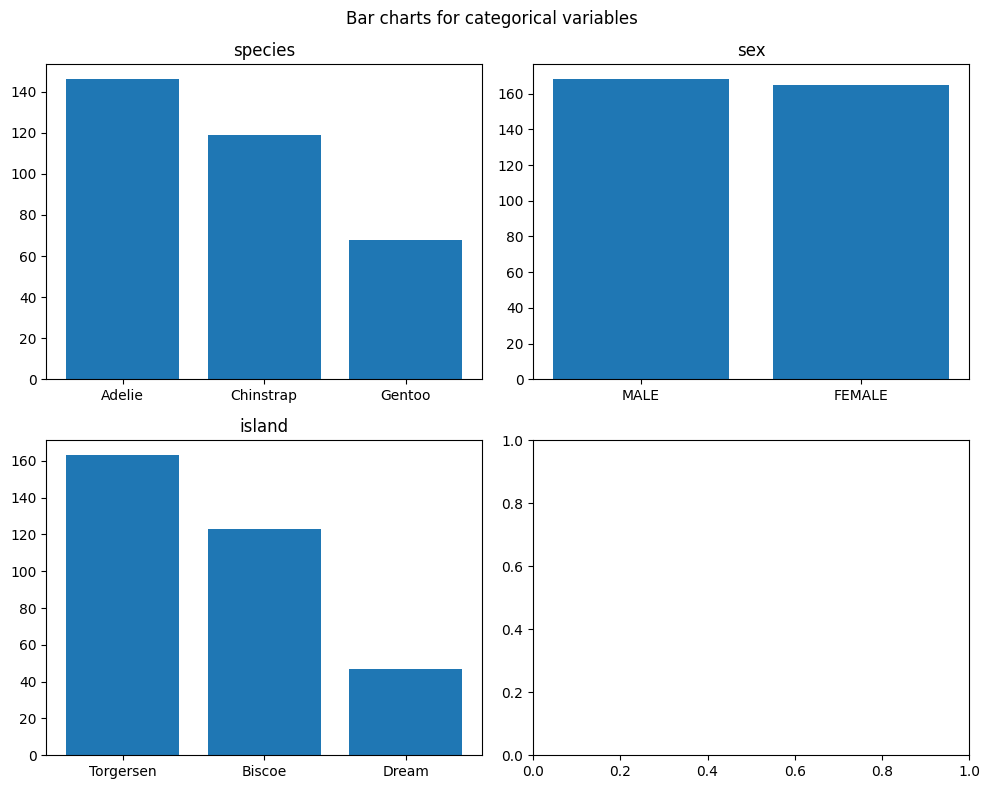

In [184]:
# resolving issue found with NaN values in the 'sex' varaible resulting indexing error in synth_freq variable.
df=df.dropna() # drop rows with missing data # Cleaning empty cells (ref: https://www.w3schools.com/python/pandas/pandas_cleaning_empty_cells.asp)

# Visualise penguine categorical data with bar charts

import matplotlib.pyplot as plt # module required for the plots

#set style
plt.style.use('default')

#print(df.columns) # get variable names
c=['species', 'island', 'sex'] # set a list of the categorical variables

#set up plot for 3 charts
fig, axs = plt.subplots(2,2, figsize=(10,8)) #set a 2x2 grid for space saving
fig.suptitle('Bar charts for categorical variables ') #set title for the plot
# subplot coordinates
rows=[0,1,0] 
cols=[0,0,1]
#loop through numeric data and draw histogram
for i in range(len(c)):
    freq = df[c[i]].value_counts() #get freqency of occurance for each category
    names = df[c[i]].unique() # get categories(unique values) from categorical varaible
    axs[rows[i],cols[i]].bar(names, freq) #plot bar plot with categories on x and frequencies on y
    axs[rows[i],cols[i]].set_title(c[i]) # set variable names as subplot title

plt.tight_layout() #keep the text from overlapping
plt.show()

# ref creating multiple subplots: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
# ref bar plots: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

#### 3.4.2 Multinomial distribution

In probability theory, the multinomial distribution is a generalization of the binomial distribution which is a discrete probability distribution that depicts the occurrence of discrete (individually countable) outcomes, such as 1, 2, 3, yes, no, true, or false. For example, it models the probability of counts for each side of a k-sided die rolled n times. For n independent trials, each of which leads to a success for exactly one of k categories, with each category having a given fixed success probability, the multinomial distribution gives the probability of any particular combination of numbers of successes for the various categories. In the context of the penguin dataset the categories could be the species and the probability could be taken from the proportion of the number of penguins in each species.
<br>In NumPy the **numpy.random.multinomial** function draws samples from a multinomial distribution therefore it could be a good candidate to model categorical data in the pengiun dataset. <br>
*random.multinomial(n, pvals, size=None)*<br>
+ **n** is the number of trials
+ **pvals** is the probabilities of each outcomes
+ **size** is the number of values generated

###### Multinomial distribution (ref: https://en.wikipedia.org/wiki/Multinomial_distribution)<br>Discrete Probability Distribution: Overview and Examples (ref: https://www.investopedia.com/terms/d/discrete-distribution.asp) <br>numpy.random.multinomial (ref: https://numpy.org/doc/stable/reference/random/generated/numpy.random.multinomial.html)


*demonstrating np.random.multinominal with 20 dice rolls*

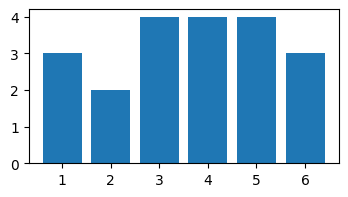

array([3, 2, 4, 4, 4, 3])

In [185]:
# numpy np.random.multinomial() SAMPLE
#random.multinomial(number of samples, probabilities, size=number of sampling or single value if None given)
import numpy as np # module containing numpy.random.multinomial
dice=np.random.multinomial(20, [1/6.]*6) #rolling a dice 20 times; output shows occurances of numbers 1-6 on the dice
x=np.linspace(1,6,6) #set x axis start at 1, stop at 6, generate 6 numbers) ref: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
plt.figure(figsize=(4,2)) #set tiny chart
plt.bar(x,dice)#plot chart
plt.show()
dice

***testing np.random.multinomial with the 'species' variable;**<br> for the number of trials **(n)**, we need the total number of values (occurrences in this case) so that the synthetic data will match the original size of the variable. This is stored in the 'tot' varaible. <br> The **(pvals)** or probability parameter equals the ratio or proportion of each individual category's occurrences to the total number of occurrences. This is calculated from the 'freq' variable which contains the value counts of each individual category (count of occurrences of unique values within the variable) and the total number of values(occurrences). No further parameters required for this model. <br>The output of the numpy random function with these parameters is stored in the 'randsample' variable. <br>In order to compare the original and synthetic data we need to generate a synthetic 'freq' variable with the data from 'randsample' and the contents of 'categories' variable which has the unique values from the 'species' dataframe variable. These are combined with pandas pd.Series function into 'synth_freq' variable. This way the variables have the same structure and can be compared easily both by printing out and visually with a bar chart that will overlay the synthetic and original data.*

Original 'species' data:
species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

Synthetic 'species' data:
Adelie       148
Chinstrap    131
Gentoo        54
dtype: int32


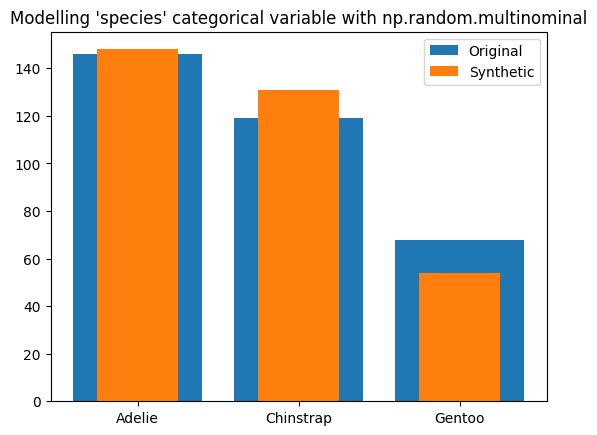

In [186]:
# modelling categorical data with np.random.multinomial 
freq = df['species'].value_counts() #Return a Series containing the frequency of each distinct row in the Dataframe =ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html)
tot=df['species'].count() #count of total number of values
probs=freq/tot #probability of category occurance (freqency / total number of values)
probs=probs.tolist()
randsample= np.random.multinomial(tot, probs) # generate random sample of each variable (tries=total number of variables, probs=based on each category's frequency, size is not given as we only want one set of data
categories=df['species'].unique() #get unique values within the variable
synth_freq=pd.Series(randsample,index=categories) # create synthetic variable with the generated freqency data using the categories as index (ref: https://www.w3schools.com/python/pandas/pandas_series.asp)

#Print results
print("Original 'species' data:")
print(freq)
print("\nSynthetic 'species' data:")
print(synth_freq)
#Visualise results
plt.bar(categories,freq,label='Original')
plt.bar(categories,synth_freq,width=0.5, label='Synthetic')
plt.legend()
plt.title("Modelling 'species' categorical variable with np.random.multinominal")
plt.show()

*now that we have a working model, it can be encapsulated in a function and used for all the categorical variables. For space-saving, the text based comparison is excluded, only the bar chart visualisation employed.*

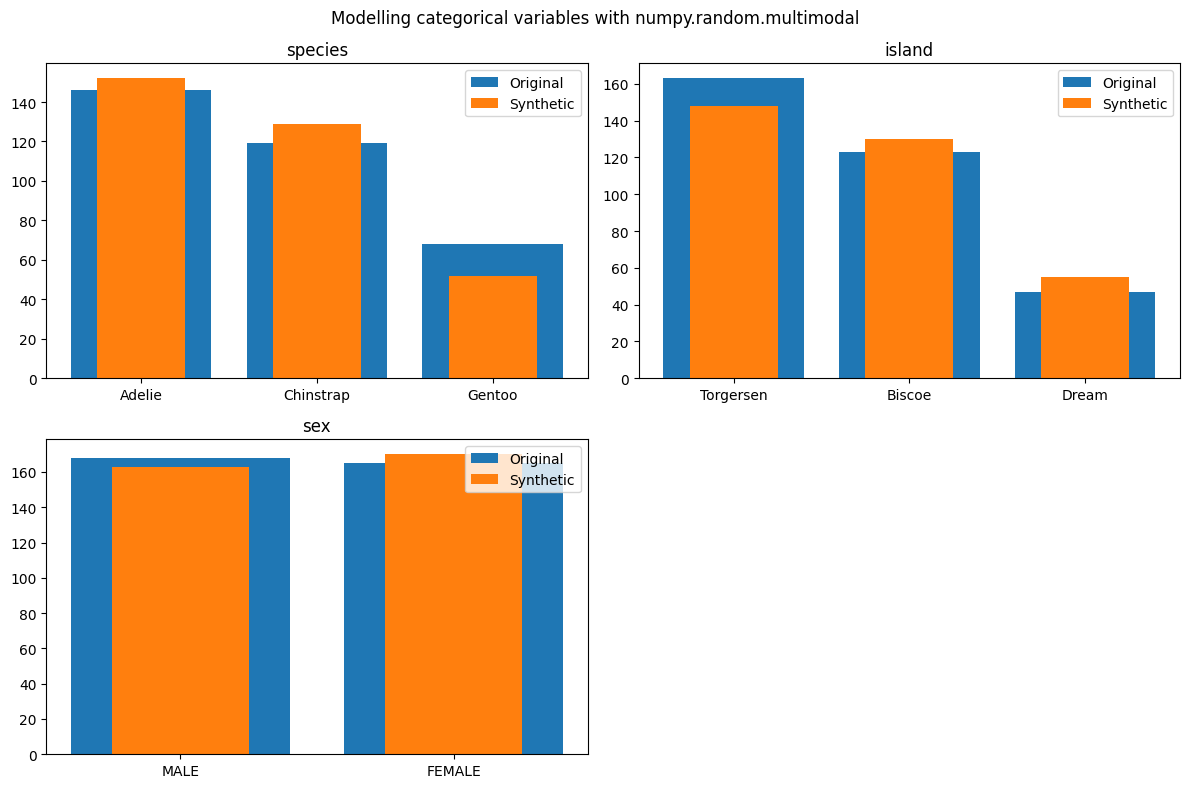

In [187]:
# encapsulate modelling categorical data with np.random.multinominal and plotting comparative results
def fn_multimod(variablename,pos):
    #multinomial model
    categories=df[variablename].unique() 
    freq = df[variablename].value_counts() 
    tot=df[variablename].count()
    probs=freq/tot 
    randsample= np.random.multinomial(tot, probs) 
    synth_freq=pd.Series(randsample,index=categories) 
    #Visualise results--
    plt.subplot(2,2,pos)#set up grid and positions
    plt.title(variablename)
    plt.bar(categories,freq,label='Original')
    plt.bar(categories,synth_freq,width=0.5, label='Synthetic')
    plt.tight_layout()
    plt.legend()
#--End of function---------------------------------------

# visualise original and generated data
plt.figure(figsize=(12, 8))
plt.suptitle("Modelling categorical variables with numpy.random.multimodal")
plt.tight_layout()
c=['species', 'island', 'sex']
for i in range(3):
    fn_multimod(c[i],i+1)


Using numpy np.random.multinomial function, to model the categorical data in the penguin dataset, the code was able to produce randomized sample data, similarly distributed as the original.


##### 3.4.1 Visualising continuous data with histograms
A histogram is an approximate representation of the distribution of numerical data. Histograms give a rough sense of the density of the underlying distribution of the data, and often for density estimation: estimating the probability density function of the underlying variable.
A histogram is a common and effective way to understand the distribution of a dataset, especially when dealing with continuous variables such as the biometric data of the penguins dataset.<br>


###### Histogram (ref: https://en.wikipedia.org/wiki/Histogram)

*batch generating histograms for each numeric variables, similarly to the bar charts, using a for loop and list variables for the variable names and subplot coordinates. Mean is also calculated and displayed to aid the analysis.*

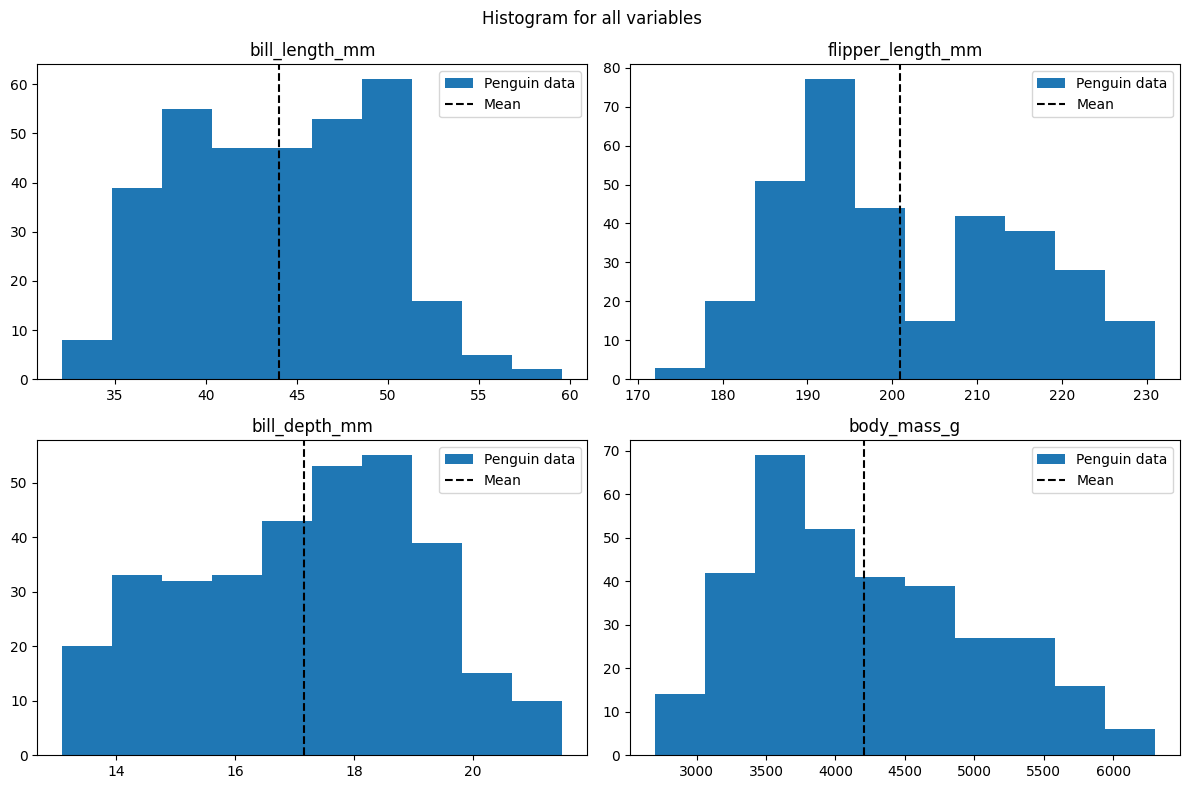

In [188]:
# Visualise penguine biometric data with histograms including median

import matplotlib.pyplot as plt
import numpy as np
#set variable names
#print(df.columns)
c=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

#set up plot for 4 charts
fig, axs = plt.subplots(2,2, figsize=(12,8))
fig.suptitle('Histogram for all variables ',fontsize=12)
rows=[0,1,0,1]
cols=[0,0,1,1]
#loop through numeric data and draw histogram
for i in range(len(c)):
    mean = df[c[i]].mean()
    std = df[c[i]].std()
    #print(mean,std,i)
    #row and colm numbers will be either 0 or 1 as the 4 loops complete
    axs[rows[i],cols[i]].hist(df[c[i]],bins=10,label="Penguin data")
    axs[rows[i],cols[i]].set_title(c[i])
    axs[rows[i],cols[i]].axvline(mean, color="black", ls="--", label="Mean")
    axs[rows[i],cols[i]].legend()

plt.tight_layout() #keep the text from overlapping
plt.show()
# ref creating multiple subplots: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
# ref matplotlib histograms: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# ref draw median: https://python-graph-gallery.com/basic-histogram-in-matplotlib/


The generated histograms show various data distribution shapes. 'bill_lenght_mm' appears more or less symmetrical with about equal parts of the data showing on either side of the Mean. 'flipper_lenght_mm' is either right skewed or possibly multimodal, 'bill_depth_mm' is roughly symmetrical or slightly left skewed and body_mass_g appearing right skewed.

###### A Complete Guide to Histograms (ref:https://chartio.com/learn/charts/histogram-complete-guide/)

#### 3.5 Suggesting appropriate probability distribution from the numpy random distribution list to model numeric data from the penguin dataset.


##### 3.5.1 Normal Distribution

Normal distribution (gaussian distribution) is a type of continuous probability distribution. It is one of the most commonly used distributions in data science. Many real-life phenomena such as peoples’ height, the size of things produced by machines etc. follow normal distribution. <br> It could be assumed that biometric data from the penguin dataset is likely to follow the same distribution, therefore normal distribution is a good candidate to model these variables.

The probability density for the Gaussian distribution according to the NumPy documentation is;
$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}} $$
This equation defines the shape of the bell curve that characterizes the Normal (also known as Gaussian) distribution, with the Mean (μ) at the center and the Standard Deviation (σ) controlling the spread of the curve.<br>
Normal distributions are important in statistics and are often used in the natural and social sciences to represent real-valued random variables (such as biometric data of the penguins) whose distributions are not known.<br>
Numpy's normal distribution function 'numpy.random.normal' draws random samples from a normal (Gaussian) distribution with parameters **Loc** which equals (μ) or the mean of the distribution, **scale** equaling the standard deviation or (σ), the **size** parameter determines the number of samples.

###### Normal distribution (ref: https://en.wikipedia.org/wiki/Normal_distribution) <br> numpy.random.normal (ref: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) <br>4 Probability Distributions Every Data Scientist Needs to Know (ref: https://builtin.com/data-science/probability-distributions-data-science)

*demonstrating numpy.random.normal utilising sample code from numpy documentation*

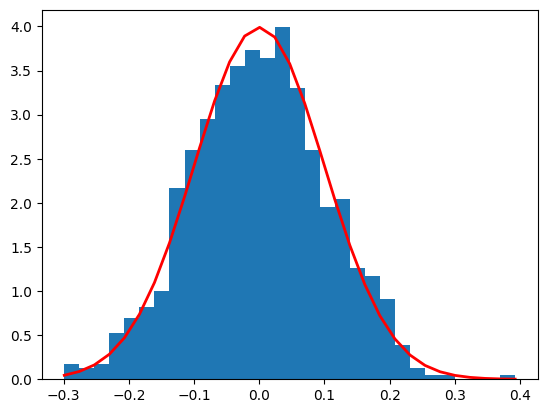

In [189]:
#numpy.random.normal - sample from https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
    #random.normal(loc=0.0, scale=1.0, size=None)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
#Verify the mean and the variance:
abs(mu - np.mean(s))
abs(sigma - np.std(s, ddof=1))
#Display the histogram of the samples, along with the probability density function:
#import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In order to test if a Normal Distribution model is applicable to the numeric variables in the Penguin dataset, the following visualization will draw the Normal Distribution curve using NumPy's random.normal function, passing the Mean (μ) and Standard Deviation (σ) parameters from the four numeric variables from the penguin data, and will simultaneously generate histograms of the original data, visually representing how much the normal distribution curve can fit the shape of the original data distribution.

*the combined visualisation of the histograms and the normal distribution model are dynamically generated repurposing the same method as before with variable names and coordinates stored in variables. <br>
The random distribution function is encapsulated in 'fn_NormDist' function passing 'mu' and 'sigma' variables for the random function and 'grid' variable for subplot positions. The code for the gaussian curve is based on the sample code from the numpy documentation. <br>Within a for loop, mean and standard deviation is calculated and stored and a histogram rendered for each iterated variable, the fn_NormDist function is subsequently called to overlay the Normal Distribution curve calculated with the individual mean and standard deviation values.*

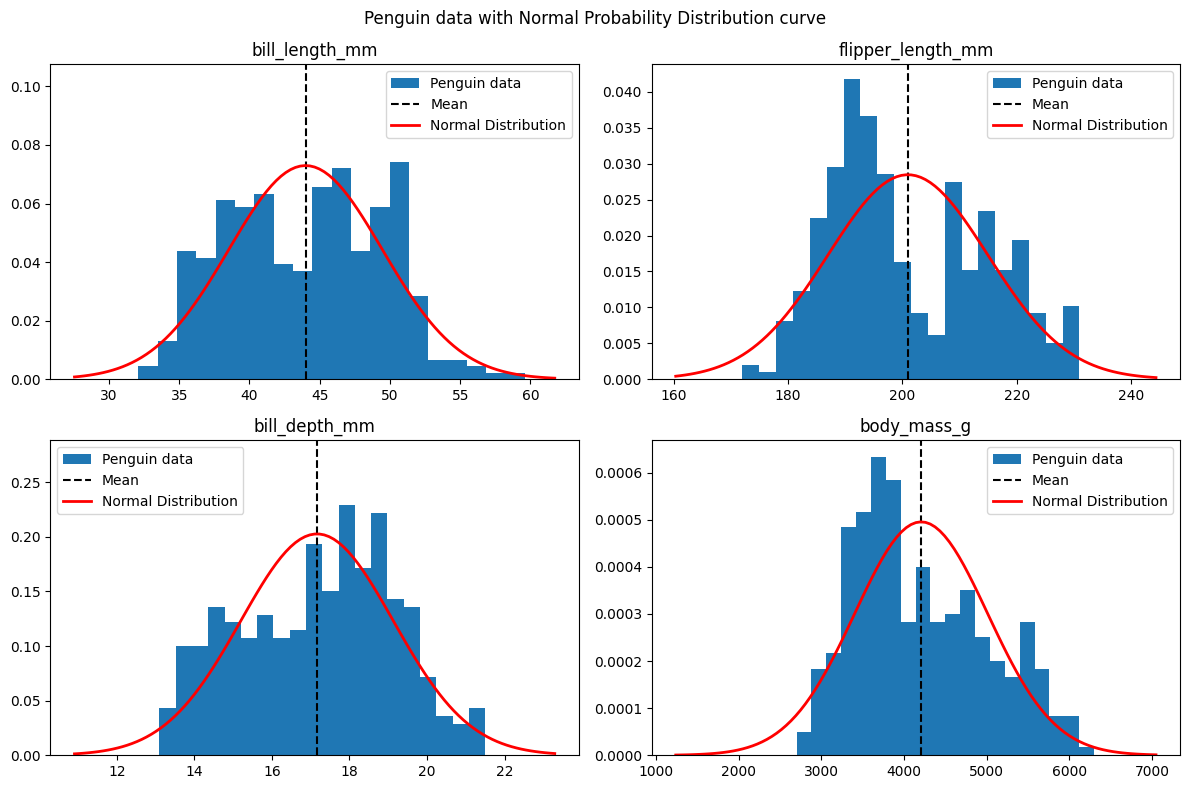

In [190]:
#Normal Distribution overlay with penguin data

# list of numeric variables from Penguins dataset
c=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
#set up chart with 2x2 grid for the 4 numberic variables
fig, axs = plt.subplots(2,2, figsize=(12,8))
fig.suptitle('Penguin data with Normal Probability Distribution curve')# set title
#store grid coordinates for each plot
rows=[0,1,0,1]
cols=[0,0,1,1]
#Create function to draw Normal Distribution reusing NumPy example code from:
    #https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#
def fn_NormDist(mu,sigma,grid): # 'mu:' mean, 'std:' standard deviation, 'grid:' chart coordinate position
    #modified np.random.normal() from numpy documentation
    s = np.random.normal(mu, sigma, 1000)
    abs(mu - np.mean(s))
    abs(sigma - np.std(s, ddof=1))
    count, bins, ignored = axs[grid].hist(s, 100, density=True,alpha=0)
    axs[grid].plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
            linewidth=2, color='r',label='Normal Distribution')
    axs[grid].legend()
#-----end of fn_NormDist function
# run a for loop to iterate through the numeric variables
for i in range(len(c)):
    mean = df[c[i]].mean() # calculate and store mean
    std = df[c[i]].std() #calculate and store standard deviation
    axs[rows[i],cols[i]].hist(df[c[i]],bins=20,density=True, label="Penguin data")
    axs[rows[i],cols[i]].axvline(mean, color="black", ls="--", label="Mean")
    axs[rows[i],cols[i]].set_title(c[i])
    axs[rows[i],cols[i]].legend()
    grid=rows[i],cols[i] #pass grid coordinate
    #print(grid)
    fn_NormDist(mean,std,grid)
plt.tight_layout()
plt.show()

Based on the results, Normal distribution could be adequate to model 'bill_lenght_mm' and 'bill_depth_mm' in the penguin dataset both showing roughly simetrical distribution on both sides of the Mean. However, 'flipper_length_mm' and 'body_mass_g,' appear to follow different distribution shapes.

### 3.5.2 Combined random distributions

The histogram of 'flipper_length_mm' appears to be a multimodal histogram with two peaks. Multimodal data can't be modelled with a singular random distribution from the numpy library. However, a combination of random distributions could be used to model the data. Since the two peaks on the histogram appear to be more or less symmetrical, a combination of two normal distribution distributions will be tested to model the data.

###### A Complete Guide to Histograms (ref:https://chartio.com/learn/charts/histogram-complete-guide/) <br> Multimodal distribution (ref: https://en.wikipedia.org/wiki/Multimodal_distribution) <br> Drawing multiple univariate normal distributionultiple (ref: https://stackoverflow.com/questions/53152190/drawing-multiple-univariate-normal-distribution)

*to combine two normal distribution curves and the original histogram of 'flipper_length_mm' partly repurposing the previous code and the sample code from the NumPy documetnation, the Mean and Standard Deviation must be calculated and stored. As the two peaks appear more or less symmetrical it is probably safe to assume that their Mean is in the proximity of the first and third quantile, so these are also calculated and stored. The generated plot contains the original histogram and two individual normal distribution curves with the first and third quantile as Mean, while keeping the Standard Deviation from the overall calculation for both.*

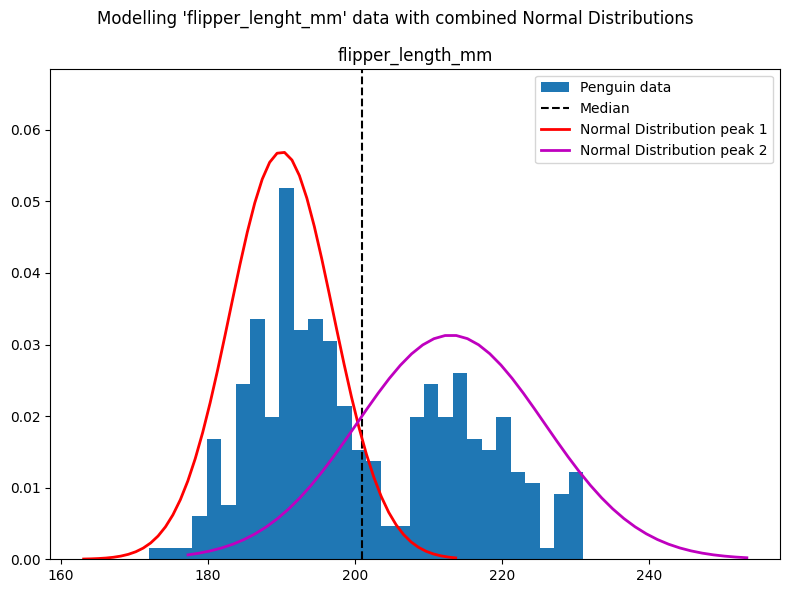

In [191]:
# modeling multimodal histogram - flipper lenght with combined normal distributions

# stats calculated and stored from 'flipper_length_mm' for modeling
c=['flipper_length_mm']
i=0
mean = df[c[i]].mean()
q1 = df[c[i]].quantile(0.25) #first quantile is the approximate mean for the first peak
q3 = df[c[i]].quantile(0.75) #third quantile is the approximate mean for the second peak
std = df[c[i]].std() 

# set plot
fig, ax = plt.subplots(1,1, figsize=(8,6))
fig.suptitle("Modelling 'flipper_lenght_mm' data with combined Normal Distributions",fontsize=12)

# Render histogram for original data
ax.hist(df[c[i]],bins=30,density=True, label="Penguin data")
ax.axvline(mean, color="black", ls="--", label="Median")
ax.set_title(c[i])
ax.legend()

# Render Normal distribution curves repurposing the sample code from NumPy documetnation

# Normal distribution for first peak
mu=q1 # first quanttile for first peak
sigma=std/2 # reduce standard deviation to model density (trial and error)
s = np.random.normal(mu, sigma, 1000)
abs(mu - np.mean(s))
abs(sigma - np.std(s, ddof=1))
count, bins, ignored = ax.hist(s, 50, density=True,alpha=0)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
            linewidth=2, color='r',label='Normal Distribution peak 1')
ax.legend()

# Normal distribution for second peak
mu=q3 # third quanttile for second peak
sigma=std/1.1 # reduce standard deviation to model density (trial and error)
s = np.random.normal(mu, sigma, 1000)
abs(mu - np.mean(s))
abs(sigma - np.std(s, ddof=1))
count, bins, ignored = ax.hist(s, 50, density=True,alpha=0)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
            linewidth=2, color='m',label='Normal Distribution peak 2')
ax.legend()

plt.tight_layout()
plt.show()

The model with two combined normal distributions produces an approximate shape of the original data distribution.

### 3.5.3 Gamma distribution

The histogram of 'body_mass_g' has a right skewed shape, which means that it can't be modelled with a normal distribution. There are a number of distributions in the numpy library that could model right skewed data such as 'body_mass_g. Lognormal, Gumbel or Gamma distributions being the most promising based on their shape. In this case the Gamma distribution will be tested to model 'body_mass_g' data.

The Gamma distribution is a two-parameter family of continuous probability distributions. The most common parameterization is with a shape parameter $k$ and a scale parameter $\theta$ both positive real numbers. 

###### Gamma Distribution (ref: https://en.wikipedia.org/wiki/Gamma_distribution) <br> numpy.random.gamma (ref: https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html)

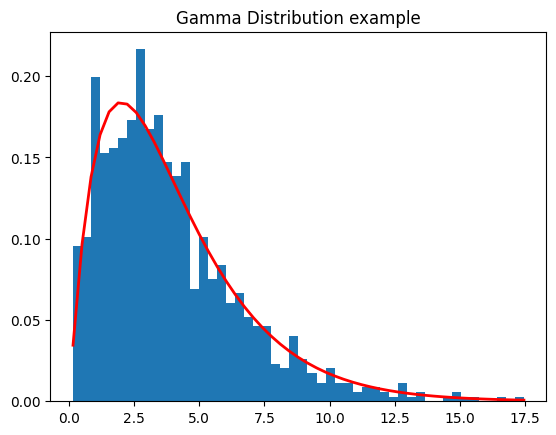

In [192]:
#Sample from: https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html

shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000)
import matplotlib.pyplot as plt
import scipy.special as sps  
count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')
plt.title("Gamma Distribution example")
plt.show()

*the gamma distribution model was tested with the original Mean as 'shape' and Standard Deviation as scale parameters with various modifiers based on trial and error until the shape was sufficiently similar to the original data. The final version has scale=Mean/2000 and scale=Standard Deviation unchanged. The original 'body_mass_g' histogram is rendered with the original data, while the gamma distribution histogram is superimposed with 50% transparency, so both shapes are visible.*

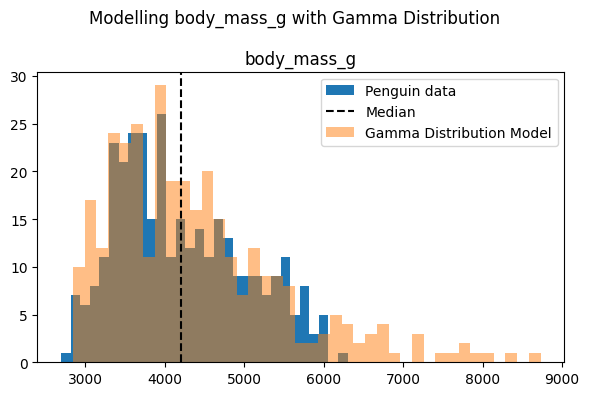

In [193]:
# Modelling body_mass_g data with Gaussian distribution

# reusables from variable
c=['body_mass_g']
i=0
mean = df[c[i]].mean()
std = df[c[i]].std() 
# set plot
fig, ax = plt.subplots(1,1, figsize=(6,4))
fig.suptitle(f"Modelling {c[i]} with Gamma Distribution",fontsize=12)
# histogram for original data
ax.hist(df[c[i]],bins=30, label="Penguin data")
ax.axvline(mean, color="black", ls="--", label="Median")
ax.set_title(c[i])
ax.legend()
grid=rows[i],cols[i] #pass grid coordinate
# histogram for random gamma distribution
shape = mean/2000 # shape fitting with trial and error
scale = std # shape fitting with trial and error
np.random.seed(42) #adding random seed for reproducibility
# gamma function repurposed from: https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html
s = (df[c[i]].min())+(np.random.gamma(shape, scale, len(df[c[i]]))) # gamma starts from minimum value in body_mass_g variable, size equals the size of the array
#draw gamma histogram
ax.hist(s, 40,alpha=0.5,label="Gamma Distribution Model")
ax.legend()
plt.tight_layout()
plt.show()

The model with Gamma distribution generates data with a histogram with similar shape as the original body_mass_g data.

#### End of Task 3. Modelling penguins dataset variables with numpy's random distribution
---
***

## Task 4. Shannon's Entropy formula plotted for coin flipping

Task description:
> Suppose you are flipping two coins, each with a probability p of giving heads. Plot the entropy of the total number of heads versus p.

To plot the entropy of the total number of heads when flipping two coins with a probability p of getting heads, the simplified formula for Shannon's entropy can be used:<br> <br>
$ H(p) = - (1 - p)* log(1 - p) - p* log(p) $ 

Shannon's entropy, also known as information entropy, is a concept introduced by Claude Shannon in the field of information theory. It quantifies the amount of uncertainty, randomness, or surprise associated with a set of possible outcomes.
<br> In case of a dice for example, if the dice is fair, and it is equally likely to show any number from 1 to 6, the entropy is high, however if the dice is loaded, and we know which side it is more likely to land on, the entropy or uncertainty of the outcome is lower.
<br> In the context of probability theory, Shannon's entropy measures the average amount of information, in bits, needed to describe the outcome of a random variable.

###### Entropy in Information Theory (ref: https://en.wikipedia.org/wiki/Entropy) <br> Shannon's formula (ref: *'Lecture Notes from fund_t04v06_entropy - Vew-only'*, 15. November.2023 - Ian McLoughlin)

*repurposing Shannon's simplified formula from the lecture notes*

In [194]:
#From lecture notes - Shannon's Entropy formula encapsulated in function 'H'
def H(p):
    return -(1-p) * np.log2(1.0-p)-p*np.log2(p)

#test with a 50% chance (a fair coin)
H(0.5)

1.0

*plotting the probability (p) against Entropy using the function 'H()' from the lecture notes, adding code to facilitate more than one coins*

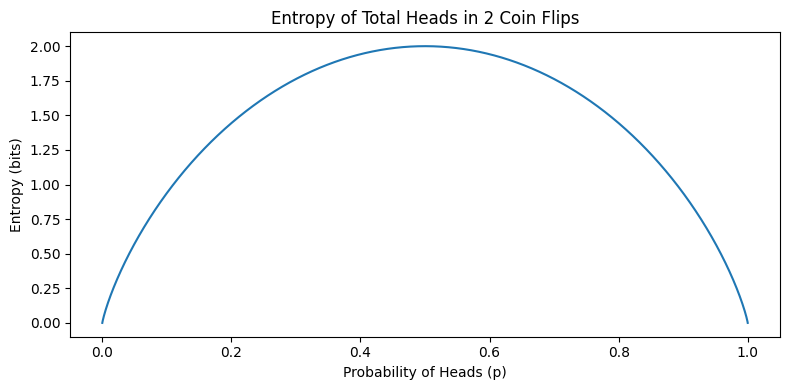

In [195]:
# plot the entropy for probability p

# create plot
fig,ax=plt.subplots(figsize=(8,4))

#p is probability
p=np.linspace(0.00000001,0.99999999,10001) # from lecture notes - 10k+1 probabilities

#changes to code in lecture notes to facilitate more than one coin
number_of_coins=2 #store number of coins
p_coin=H(p)#get entropy for each probability
plotMe=p_coin*number_of_coins #store entropy multiplied by number of coins to capture total possible number of heads

#Plot H(p) (Entropy for p Probabilty)
ax.plot(p,plotMe)
# labels
plt.xlabel('Probability of Heads (p)')
plt.ylabel('Entropy (bits)')
plt.title(f'Entropy of Total Heads in {number_of_coins} Coin Flips')
plt.tight_layout()
plt.show()

The maximum entropy for flipping two coins is two. This is because there are two possible outcomes for each coin with the maximum entropy of 1.0 (fair coin, 50% equal chance). Since we have two coins the maximum entropy is 2.0.

### End of Task 4. Shannon's Entropy formula plotted for coin flipping
---
***

## Task 5. Create an appropriate individual plot for each of the variables in the penguin dataset.


### 5.1 Preparation

For this task the penguin dataset is read from the previously exported .csv file, so we have the original data without previous manipulation.

In [196]:
# reading in data
df = pd.read_csv("data/penguins.csv")
#check dataset variables and get summary statistics.
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


For the visualisation of each variable in the penguin dataset, a combination of matplotlib and the seaborn visualisation libraries will be used.<br>
**Matplotlib** is a plotting library for the Python programming language, designed to provide an alternative for MATLAB users. Matplotlib was originally written by John D. Hunter in 2003. Since then, it has had an active development community and is distributed under a BSD-style licence which allows for a broad range of uses.<br> **Seaborn** is another Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. It builds on top of matplotlib and integrates closely with pandas data structures.

###### Matplotlib (ref: https://en.wikipedia.org/wiki/Matplotlib) <br> seaborn (ref: https://seaborn.pydata.org/)

In [197]:
import seaborn as sns # import seaborn module
import matplotlib.pyplot as plt # import seaborn module

#set styles 
plt.style.use('fivethirtyeight') #Style sheet reference (ref: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

### 5.2 Visualizing 'species' categorical variable with bar chart

The penguins 'species' is a categorical variable in the dataset. Important characteristics of categorical variables that there is no hierarchical way of ordering these categories, and that they represent qualitative values therefore they cannot be represented on a numeric scale. Hence, a histogram is not always the most appropriate to analyse categorical data. Categorical variables are commonly visualized with frequency tables, bar charts and pie charts. For 'species' a bar chart will be used for visualisation.

###### Bar Chart (ref: https://en.wikipedia.org/wiki/Bar_chart) <br> 8 easy plotting categorical variables with seaborn for Pandas Dataframe (ref: https://medium.com/@DemetrioCN/8-easy-plotting-categorical-variables-with-seaborn-for-pandas-dataframe-15bcdc10e99a) <br> Bar Chart (ref: https://www.jmp.com/en_nl/statistics-knowledge-portal/exploratory-data-analysis/bar-chart.html#:~:text=Bar%20charts%20make%20sense%20for,responses%20have%20a%20defined%20order.)<br> Types of Data Visualizations for Categorical Dataset (ref: https://vitalflux.com/categorical-data-visualization-concepts-examples/) 

*matplotlib's bar chart takes **x** and **height** as minimum parameters. **x** being the x-axis in the case of the 'species' variable is calculated by taking the unique values from the variable with pandas .unique()function and the list stored in **x** variable, while the values for **height** parameter stored in **counts** by counting the occurrences of each unique value with pandas .value_counts() function. Additionally, taken from the "bar color demo" from the matplotlib documentation, parameters for bar labels (=x) and bar colours (set manually in bar_colors) were set.*

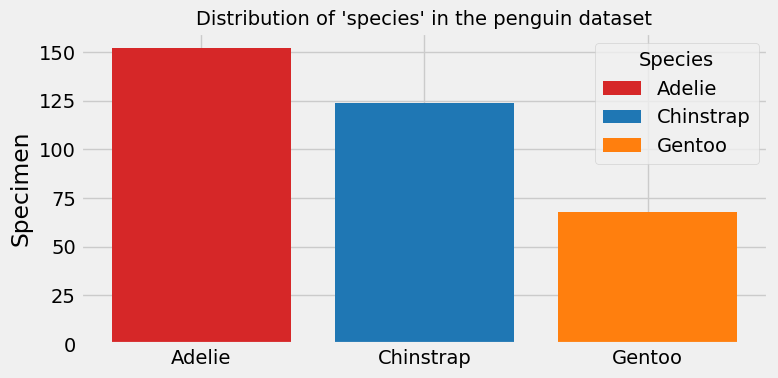

In [198]:
# Bar plot for 'species' varaible

fig, ax = plt.subplots(figsize=(8,4))#set up plot

counts = df['species'].value_counts() #count occurances of each unique value (ref: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)
x = df['species'].unique() # get categories(unique values) from categorical varaible (ref: https://pandas.pydata.org/docs/reference/api/pandas.unique.html)
bar_labels = x
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

ax.bar(x, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Specimen')
ax.set_title('Distribution of \'species\' in the penguin dataset', fontsize=14)
ax.legend(title='Species')

plt.tight_layout()
plt.show()

# Bar color demo (ref:https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html#sphx-glr-gallery-lines-bars-and-markers-bar-colors-py)

### 5.2 Visualizing 'island' categorical variable with bar chart

'island' is also a categorical variable, similarly to 'species' a bar plot visualisation is perfectly suitable, some minor styling changes were added to distinguish between the two varaibles.

*instead of colours, the bars in the island visualization are distinguished by patterns using the **hatch** parameter, storing the various patterns in the **hatches** variable*

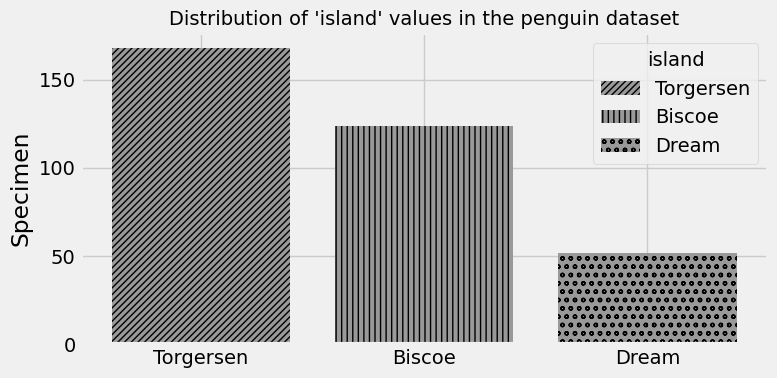

In [199]:
# Bar plot for 'island' varaible

fig, ax = plt.subplots(figsize=(8,4))#set up plot

counts = df['island'].value_counts() #count occurances of each unique value (ref: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)
x = df['island'].unique() # get categories(unique values) from categorical varaible (ref: https://pandas.pydata.org/docs/reference/api/pandas.unique.html)
bar_labels = x
hatches = ['/////', '|||', 'oo']

ax.bar(x, counts, label=bar_labels, hatch=hatches,color='#999999')

ax.set_ylabel('Specimen')
ax.set_title('Distribution of \'island\' values in the penguin dataset', fontsize=14)
ax.legend(title='island')

plt.tight_layout()
plt.show()

# Bar color demo (ref:https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html#sphx-glr-gallery-lines-bars-and-markers-bar-colors-py)
# How To Fill Plots With Patterns In Matplotlib (ref: https://towardsdatascience.com/how-to-fill-plots-with-patterns-in-matplotlib-58ad41ea8cf8)

### 5.2 Visualizing 'bill_length_mm' continuous numeric variable with histogram

There are many ways of visualizing continuous numeric data depending on the overall context of the data, relations with other variables, the general purpose or the expected audience of the visualization for example.<br> The 'bill_lenght_mm' variable contains one of the 4 biometric measurements regarding the penguins in the dataset. In this context, perhaps the most interesting attribute of this data is how its data points’ values are distributed.<br>
A histogram is the most commonly used graph to show frequency distributions of continuous data. It is an approximate representation of the distribution of numerical data, visualizing how often each different value in a set of data occurs. <br>
Histograms are chosen for numeric data visualization because they reveal distribution shape, central tendency (Mean), spread (Standard deviation), outliers, and data range in a visual manner. <br>
By visualizing and analysing the data distribution in numeric variables of the dataset we can determine which random distribution model is the most suitable to model the data.

###### WHAT IS A HISTOGRAM? (ref: https://asq.org/quality-resources/histogram) <br> Histogram (ref:https://en.wikipedia.org/wiki/Histogram)

*Matplotlib's histogram function requires **x** as minimum parameter, which represents the data to be plotted. In this case, the 'bill_length_mm' data from the DataFrame is providing the values for **x** while the additional **label** parameter provided manually and **bins** parameter adjusted to 42 for a more detailed distribution. Additionally, x and y-axis labels are set manually.*

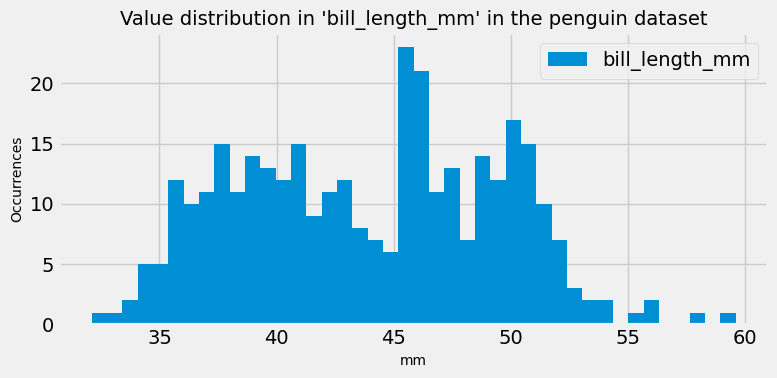

In [200]:
#histogram for 'bill_length_mm'

fig, ax = plt.subplots(figsize=(8,4))#set up plot

ax.hist(df['bill_length_mm'],label='bill_length_mm',bins=42)
ax.set_title('Value distribution in \'bill_length_mm\' in the penguin dataset', fontsize=14)
ax.set_ylabel('Occurrences', fontsize=10)
ax.set_xlabel('mm', fontsize=10)

plt.legend()
plt.tight_layout()
plt.show()

# pl.hist() (ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

### 5.4 Visualizing 'bill_depth_mm' with box plot

Box plots are effective tools for visualizing the distribution of numeric data. They offer a high-level overview of essential statistical characteristics, a good visual representation on the central tendencies within the data, based on five attributes; minimum, first quartile, median, third quartile and maximum. The box represents the central 50% of the data with a line representing the median value, while the whiskers cover the remaining range of the data. Outliers are plotted outside the whiskers range as individual points. <br>

###### <img src="https://api.www.labxchange.org/api/v1/xblocks/lb:LabXchange:d8863c77:html:1/storage/211626365402575-b88c4d0fdacd5abb4c3dc2de3bc004bb.png" alt="Alt text" width="500" height="250"/> <p>*The anatomy of a boxplot. - Image source: www.labxchange.org*</p>

###### Understanding Boxplots (ref: https://builtin.com/data-science/boxplot) <br> A Complete Guide to Box Plots (Ref: ˙ref: https://chartio.com/learn/charts/box-plot-complete-guide/)

*similarly to the matplotlib histogram, seaborn's box plot can work with only one data parameter, **x** (for horizontal orientation that is) for the data to be plotted as minimum parameter. In this case, **x** is the 'flipper_depth_mm' variable from the penguin DataFrame.*

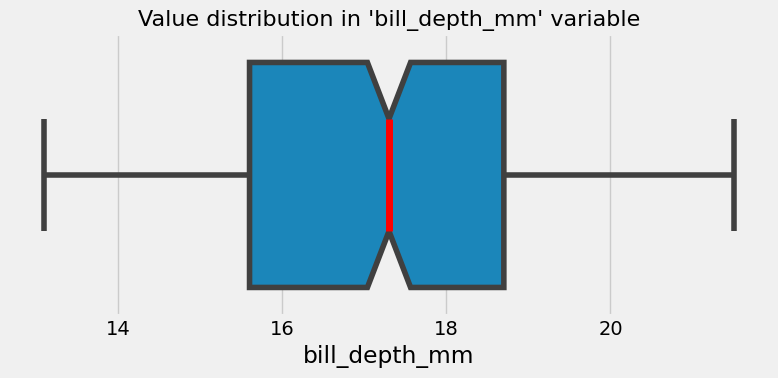

In [201]:
# box plot for 'bill_depth_mm'

fig, ax = plt.subplots(figsize=(8,4))#set up plot
sns.boxplot(x=df['bill_depth_mm'],notch=True,medianprops={"color": "r", "linewidth": 5})
ax.set_title('Value distribution in \'bill_depth_mm\' variable', fontsize=16)
plt.tight_layout()
plt.show()

#box plot (ref: https://seaborn.pydata.org/generated/seaborn.boxplot.html)

Seabnorn's boxplot can facilitate grouping the numerical data by categorical data by adding a categorical variable as the **y** parameter so we can separate the data by categories and further separate and colour code them by adding the **hue** parameter.

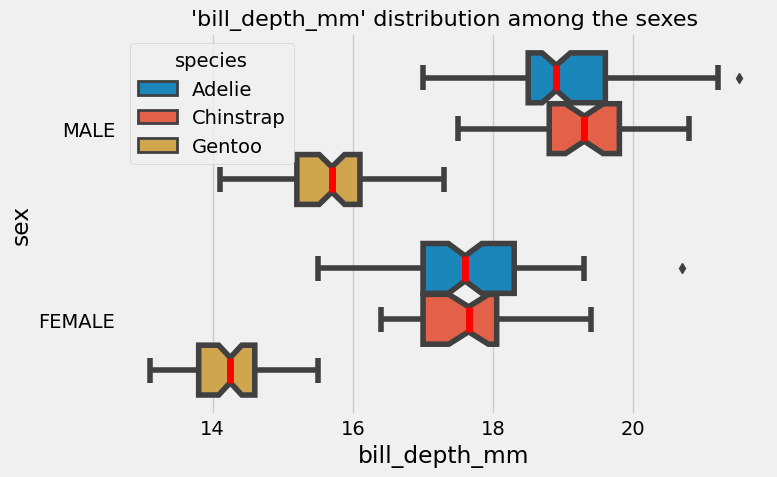

In [202]:
# box plot for 'bill_depth_mm' with categorical groups 'sex' and 'species'

fig, ax = plt.subplots(figsize=(8,5))#set up plot
sns.boxplot(x=df['bill_depth_mm'], y=df['sex'],hue=df['species'],notch=True,medianprops={"color": "r", "linewidth": 5})
ax.set_title('\'bill_depth_mm\' distribution among the sexes', fontsize=16)
plt.tight_layout()
plt.show()

### 5.5 Visualizing the relation between 'flipper_length_mm' and 'body_mass_g' numeric variables with scatter plot

In case of 'flipper_length_mm', instead of rendering another plot for a singular variable, it may be more interesting to visualize the relationship between two variables with a scatter plot. A scatter plot is a type of plot for displaying values for typically two variables for a set of data (If the points are coded (colour/shape/size), one additional variable can be displayed.). The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. Scatter plots’ primary uses are to observe and show relationships between two numeric variables. The dots in a scatter plot not only report the values of individual data points, but also patterns when the data are taken as a whole. 

###### Scatter plot (ref: https://en.wikipedia.org/wiki/Scatter_plot) <br> A Complete Guide to Scatter Plots (ref: https://chartio.com/learn/charts/what-is-a-scatter-plot/#:~:text=What%20is%20a%20scatter%20plot,to%20observe%20relationships%20between%20variables)

*seaborn's scatter plot takes **x** for the x-axis and **y** for the y-axis as minimum parameters. In this case, **x** and **y** are the 'flipper_length_mm' and 'body_mass_g' columns of the penguin DataFrame retrospectively. 

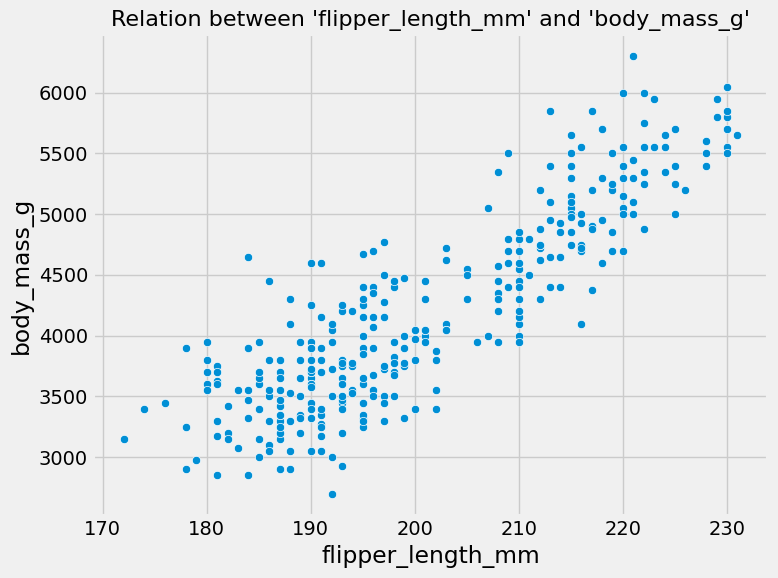

In [203]:
# scatter plot for 'flipper_length_mm' vs 'body_mass_g'

fig, ax = plt.subplots(figsize=(8,6))#set up plot
sns.scatterplot(x=df['flipper_length_mm'], y=df['body_mass_g'])
ax.set_title('Relation between \'flipper_length_mm\' and \'body_mass_g\'', fontsize=16)
plt.tight_layout()
plt.show()

The data on seaborn's scatter plots can also be grouped and colour coded by categorical data using the **hue** variable. In this case the function will require a **data** parameter as well which in this case is the DataFrame itself.

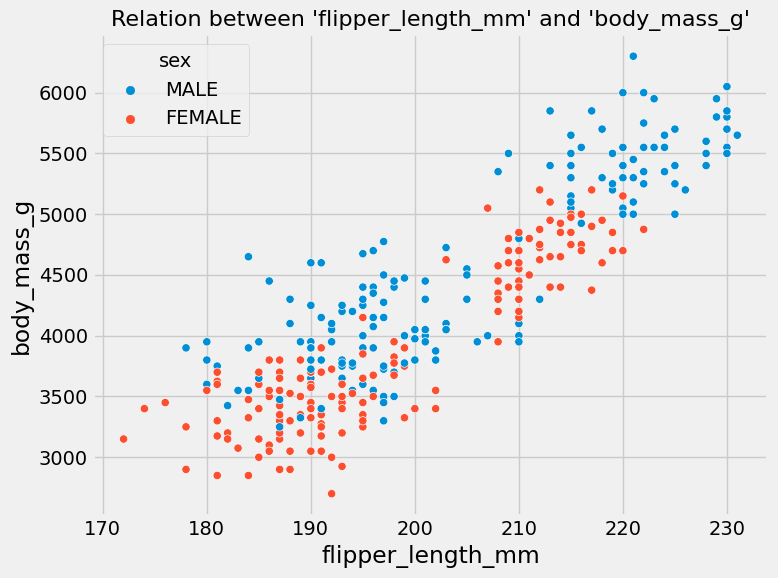

In [204]:
# scatter plot for 'flipper_length_mm' vs 'body_mass_g' grouped by 'sex'

fig, ax = plt.subplots(figsize=(8,6))#set up plot
sns.scatterplot(data=df,x=df['flipper_length_mm'], y=df['body_mass_g'],hue='sex')
ax.set_title('Relation between \'flipper_length_mm\' and \'body_mass_g\'', fontsize=16)
plt.tight_layout()
plt.show()

The resulting scatter plot shows a notable positive correlation between 'body_mass_g' and 'flipper_length_mm'. Apparently larger, heavier penguins have longer flippers.

### 5.7 Categorical Data Visualization for distribution of 'body_mass_g' in the context of 'sex'

For the 'body_mass_g' variable, a categorical distribution plot is rendered to demonstrate how body mass is distributed within the two sexes of the species using violin plot.
Categorical plots show the relationship between a numerical and one or more (if hue is specified) categorical variables.
The .catplot() function in the Seaborn library with the kind='violin' parameter can plot multiple violin plots for different category groups on the same plot, eliminating the need to create separate subplots. This feature streamlines the visualization process, making it more convenient when comparing groups or categories within the same plot.<br>
A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. It is used to visualize the distribution of numerical data. Unlike a box plot that can only show summary statistics, violin plots depict summary statistics and the density of each variable.

###### <img src="https://images.ctfassets.net/fi0zmnwlsnja/sdfgtcRp16wTNOcRceGQm/5bfcb73d2261d49ff20dd7857e0152b1/Screen_Shot_2019-03-01_at_11.36.10_AM.png" alt="Alt text" width="300" height="250"/> <p>*The anatomy of a violin plot. - Image source: www.mode.com*</p>

###### Violin Plots 101: Visualizing Distribution and Probability Density (ref: https://mode.com/blog/violin-plot-examples)

*providing the categorical variable 'sex' as **x** for the x-axis, and the numeric variable 'body_mass_g' as **y** for the y-axis, seaborn's violin plot can render two violin plots side by side comparing the distribution of body mass data within the two sexes.*

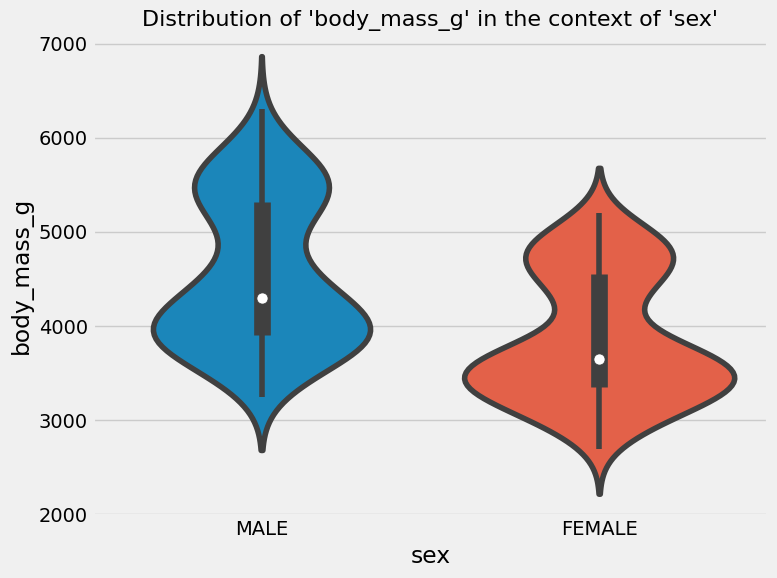

In [205]:
# violin plot for 'flipper_length_mm' vs 'body_mass_g'
fig, ax = plt.subplots(figsize=(8,6))#set up plot
sns.violinplot(x=df['sex'], y=df['body_mass_g'], kind='violin')
plt.title('Distribution of \'body_mass_g\' in the context of \'sex\'', fontsize=16)
plt.tight_layout()
plt.show()

 #Catplot (ref https://seaborn.pydata.org/generated/seaborn.catplot.html)

Apparently the males penguins are more likely to be heavier compared with the females in general.

If we wish to explore sexual differences in body mass across the different penguin species, seaborn's catplot can be used with 'species' variable as the hue parameter. This visualization reveals that the sexual differences are present across the species but also indicating that both male and female members of the Gentoo penguins are likely the heaviest among the three species.

###### seaborn.catplot (ref: https://seaborn.pydata.org/generated/seaborn.catplot.html) <br> Seaborn catplot – Categorical Data Visualizations in Python (ref: https://datagy.io/seaborn-catplot/) <br>

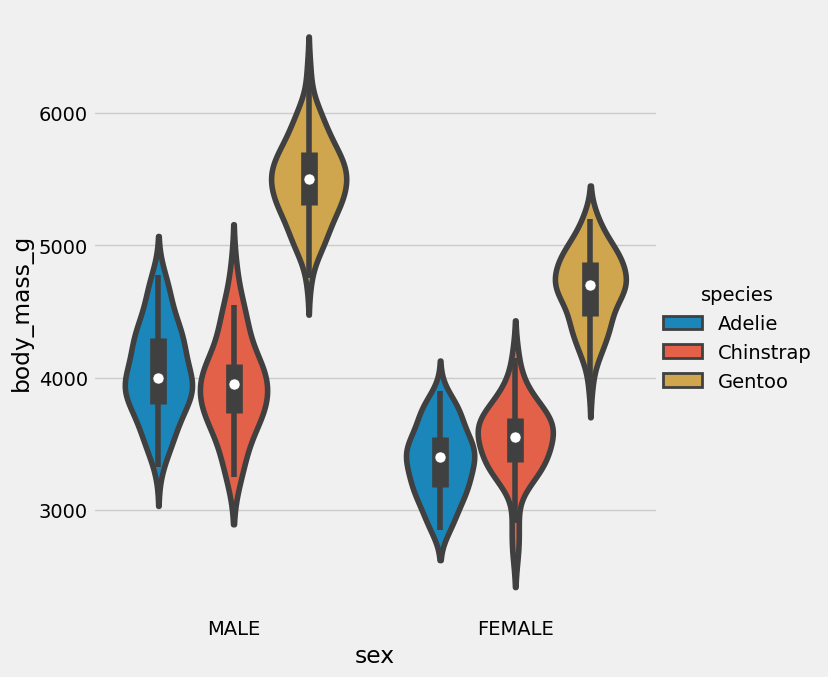

In [206]:
# Categorical Data Visualization with violin plots for 'body_mass_g' in the context of 'sex' among the species.

sns.catplot(data=df, x="sex", y='body_mass_g', hue='species', height=7, kind='violin',legend=True) 
plt.show()

### 5.8 Visualizing 'sex' variable with pie chart

As previously established, 'sex' in the penguin dataset is a categorical dichotomous variable. It can be visualized with a pie chart. Although it is not the most accurate way to show data as it is more difficult to compare the size of items in a chart when area is used instead of length like in bar charts, pie charts are very commonly used for representing proportions. A pie chart is a type of chart with the shape of a pie or circle. It presents the relationship of different parts of the data. <br>

###### Types of Data Visualizations for Categorical Dataset (ref: https://vitalflux.com/categorical-data-visualization-concepts-examples/) <br> Pie chart (ref: https://simple.wikipedia.org/wiki/Pie_chart)

*metplotlib's pie chart takes **sizes** and **labels** parameters. To calculate **sizes**, using pandas .value.counts() we can get the number of occurrences of each unique value. From this variable using pandas .index function we can list the unique values and store them in **labels**. Additionally, **autopct** provides a percentage display, and **startangle** allows for rotating the chart to the angle of the ultimate question...*

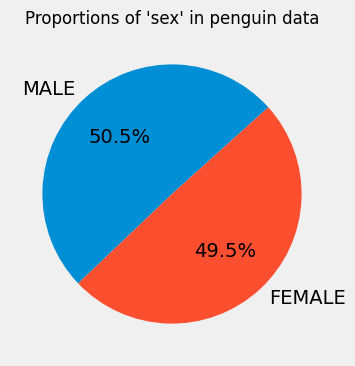

In [207]:
# render pie chart for 'species varaible

fig, ax = plt.subplots(figsize=(8,4))#set up plot
sizes=df['sex'].value_counts() #count occurences of each unique value (ref: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)
labels=sizes.index #get unique values from the variable (ref: https://dataplotplus.com/how-to-label-a-pie-plot-in-matplotlib-and-pandas/)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=42) #make pie, include percentage to one digit and rotate 42°
plt.title('Proportions of \'sex\' in penguin data', fontsize=12) #set title
plt.show()

### End of Task 5. Create an appropriate individual plot for each of the variables in the penguin dataset.
---
***